## Financial Data Analysis CSV

### Objectives

Master the skills required to load, manipulate, analyze, and export CSV data within a Jupyter Notebook environment.

#### 1. **Loading CSV Data into Jupyter**:
- Use Python's built-in csv module to read data.
- Load the CSV data into a DataFrame using the `pandas` library.
- Display the first few rows of the dataset to understand its structure.

#### 2. **Basic Data Exploration**:
- Determine the number of rows and columns in the dataset.
- Identify and handle missing values in the dataset.
- Obtain summary statistics for numerical columns.

#### 3. **Data Manipulation and Cleaning**:
- Filter clients based on specific financial criteria.
- Modify existing columns, if necessary, to derive new metrics.
- Identify and handle duplicate client entries.

#### 4. **Data Analysis with CSV Data**:
- Group clients by financial advisors and calculate aggregate metrics.
- Identify clients with the highest and lowest profits.
- Analyze the distribution of clients across different profit ranges.

#### 5. **Visualization with CSV Data**:
- Plot a bar chart showing the profit distribution across clients.
- Visualize the distribution of clients among different financial advisors using a pie chart.

#### 6. **Advanced Analysis**:
- Analyze correlations between different financial metrics, such as budget allocation and actual profit.
- Predict future profits based on historical data using basic regression techniques.

#### 7. **Exporting Data**:  
- Save the manipulated and analyzed data back to a CSV file.
- Export subsets of data, such as top-performing clients, to new CSV files.


#### Step 1.1: Use Python's built-in csv module to read data.

In [30]:
import csv

# Open the CSV file for reading
with open('profitable_clients_sorted_from_json.csv', 'r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)

#### Step 1.2: Load CSV data using the pandas library.

In [31]:
import pandas as pd

# Load the CSV data into a DataFrame
df = pd.read_csv('profitable_clients_sorted_from_json.csv')

#### Step 1.3: Display the first few rows of the dataset to understand its structure.

In [32]:
# Display the first few rows of the DataFrame
df.head()

,ClientID,ClientName,Budget,Expenses,Revenue,Profit,FinancialAdvisor
0,112,Yellow Apple,90000,84500,73000,49000.0,Hank Yellow
1,111,Orange Mango,92000,84000,143000,41000.0,Frank Black
2,102,Beta Inc,75000,50000,90000,40000.0,Bob Smith
3,104,Delta Co,85000,70000,110000,40000.0,Dave Brown
4,110,Juliet Co,99000,94000,130000,36000.0,Jack Violet


### Step 2: Basic Data Exploration

#### Step 2.1: Determine the number of rows and columns in the dataset.

In [33]:
# Assuming you've already loaded your data into a DataFrame named 'df'
shape = df.shape
print(f"The dataset has {shape[0]} rows and {shape[1]} columns.")

The dataset has 17 rows and 7 columns.


#### Step 2.2: Identify and handle missing values in the dataset.

In [34]:
# Identify columns with missing values
missing_values = df.isnull().sum()
print("Number of missing values for each column:")
print(missing_values)

# Handle missing values
# For this dataset, we'll calculate the Profit as (Revenue - Expenses) for the missing values.
df['Profit'].fillna(df['Revenue'] - df['Expenses'], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())



Number of missing values for each column:
ClientID            0
ClientName          0
Budget              0
Expenses            0
Revenue             0
Profit              2
FinancialAdvisor    0
dtype: int64

Missing values after handling:
ClientID            0
ClientName          0
Budget              0
Expenses            0
Revenue             0
Profit              0
FinancialAdvisor    0
dtype: int64


#### Step 2.3: Obtain summary statistics for numerical columns.

In [35]:
# Obtain summary statistics and round to 2 decimal places
summary_statistics = df.describe().round(1)
print("\nSummary statistics for numerical columns:\n")
print(summary_statistics)



Summary statistics for numerical columns:

       ClientID   Budget  Expenses   Revenue   Profit
count      17.0     17.0      17.0      17.0     17.0
mean      141.0  74000.0   75226.5   90529.4  37714.7
std        58.4  24934.9   33386.8   48940.2  13751.0
min       101.0   9000.0     850.0    5000.0   4150.0
25%       105.0  63000.0   70000.0   70000.0  35000.0
50%       109.0  85000.0   84000.0  100000.0  35000.0
75%       201.0  90000.0   90000.0  120000.0  40000.0
max       291.0  99000.0  150000.0  190000.0  70000.0


### Step 3: Data Manipulation and Cleaning

#### Step 3.1: Filter clients based on specific financial criteria

In [36]:
# Filter clients where expenses exceeded the budget
over_budget_clients = df[df['Expenses'] > df['Budget']]
print("\nClients with expenses exceeding their budget:")
print(over_budget_clients)



Clients with expenses exceeding their budget:
    ClientID           ClientName  Budget  Expenses  Revenue   Profit  \
5        101            Acme Corp   50000     90000     5000  35000.0   
8        106  Foxtrot Enterprises   70000    105000   100000  35000.0   
14       206      CR7 Enterprises   63000    150000   190000  70000.0   
15       201              Ace Inc   30000     70000    38000  31000.0   

   FinancialAdvisor  
5     Alice Johnson  
8       Frank Black  
14        Bob Smith  
15    Alice Johnson  


#### Step 3.2: Modify existing columns to derive new metrics

In [37]:
# Calculate profit margin and add it as a new column
df['ProfitMargin'] = (df['Profit'] / df['Revenue']).round(2)
print("\nData with added Profit Margin column:")
print(df[['ClientName', 'ProfitMargin']])



Data with added Profit Margin column:
             ClientName  ProfitMargin
0          Yellow Apple          0.67
1          Orange Mango          0.29
2              Beta Inc          0.44
3              Delta Co          0.36
4             Juliet Co          0.28
5             Acme Corp          7.00
6           Charlie LLC          0.44
7              Echo Ltd          0.29
8   Foxtrot Enterprises          0.35
9             India LLC          0.28
10            Golf Corp          0.29
11            Hotel Inc          0.26
12          Tissues Ink          0.83
13           Tennis Djo          0.50
14      CR7 Enterprises          0.37
15              Ace Inc          0.82
16          Orlando Inc          1.50


#### Step 3.3: Identify and handle duplicate client entries

In [38]:
# Identify duplicate client entries based on ClientID
duplicates = df[df.duplicated(subset='ClientID', keep='first')]
print("\nDuplicate client entries:")
print(duplicates)

# If you decide to drop duplicates:
df = df.drop_duplicates(subset='ClientID', keep='first')
print("\nData after removing duplicates:")
print(df)



Duplicate client entries:
Empty DataFrame
Columns: [ClientID, ClientName, Budget, Expenses, Revenue, Profit, FinancialAdvisor, ProfitMargin]
Index: []

Data after removing duplicates:
    ClientID           ClientName  Budget  Expenses  Revenue   Profit  \
0        112         Yellow Apple   90000     84500    73000  49000.0   
1        111         Orange Mango   92000     84000   143000  41000.0   
2        102             Beta Inc   75000     50000    90000  40000.0   
3        104             Delta Co   85000     70000   110000  40000.0   
4        110            Juliet Co   99000     94000   130000  36000.0   
5        101            Acme Corp   50000     90000     5000  35000.0   
6        103          Charlie LLC   60000     45000    80000  35000.0   
7        105             Echo Ltd   95000     85000   120000  35000.0   
8        106  Foxtrot Enterprises   70000    105000   100000  35000.0   
9        109            India LLC   95000     90000   125000  35000.0   
10       107

### Step 4: Data Analysis with CSV Data

#### Step 4.1: Group clients by financial advisors and calculate aggregate metrics


In [39]:
# Group by financial advisors and calculate aggregate metrics
grouped_by_advisor = df.groupby('FinancialAdvisor').agg({
    'Budget': 'sum',
    'Expenses': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

print("\nAggregate metrics by Financial Advisor:")
print(grouped_by_advisor)



Aggregate metrics by Financial Advisor:
  FinancialAdvisor  Budget  Expenses  Revenue    Profit
0    Alice Johnson   80000    160000    43000   66000.0
1        Bob Smith  223000    220000   320000  170000.0
2      Carol White   60000     45000    80000   35000.0
3       Dave Brown   85000     70000   110000   40000.0
4        Eve Green   95000     85000   120000   35000.0
5      Frank Black  162000    189000   243000   76000.0
6       Grace Blue   80000     75000   105000   30000.0
7      Hank Yellow  279000    250850   263000  118150.0
8          Ivy Red   95000     90000   125000   35000.0
9      Jack Violet   99000     94000   130000   36000.0


#### Step 4.2: Identify clients with the highest and lowest profits

In [40]:
# Identify client with the highest profit
highest_profit_client = df.loc[df['Profit'].idxmax()]
print("\nClient with the highest profit:")
print(highest_profit_client)

# Identify client with the lowest profit
lowest_profit_client = df.loc[df['Profit'].idxmin()]
print("\nClient with the lowest profit:")
print(lowest_profit_client)



Client with the highest profit:
ClientID                        206
ClientName          CR7 Enterprises
Budget                        63000
Expenses                     150000
Revenue                      190000
Profit                        70000
FinancialAdvisor          Bob Smith
ProfitMargin                   0.37
Name: 14, dtype: object

Client with the lowest profit:
ClientID                    291
ClientName          Tissues Ink
Budget                     9000
Expenses                    850
Revenue                    5000
Profit                     4150
FinancialAdvisor    Hank Yellow
ProfitMargin               0.83
Name: 12, dtype: object


#### Step 4.3: Analyze the distribution of clients across different profit ranges

In [41]:
# Define profit ranges
bins = [0, 10000, 20000, 30000, 40000, 50000, float('inf')]
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k+']

# Categorize clients into profit ranges
df['ProfitRange'] = pd.cut(df['Profit'], bins=bins, labels=labels, right=False)

# Count clients in each profit range
profit_distribution = df['ProfitRange'].value_counts().reset_index()
profit_distribution.columns = ['ProfitRange', 'ClientCount']

print("\nDistribution of clients across profit ranges:")
print(profit_distribution.sort_values(by='ProfitRange'))



Distribution of clients across profit ranges:
  ProfitRange  ClientCount
3       0-10k            1
5     10k-20k            0
4     20k-30k            0
0     30k-40k           10
1     40k-50k            4
2        50k+            2


### Step 5: Visualization with CSV Data

#### Step 5.1: Plot a bar chart showing the profit distribution across clients.

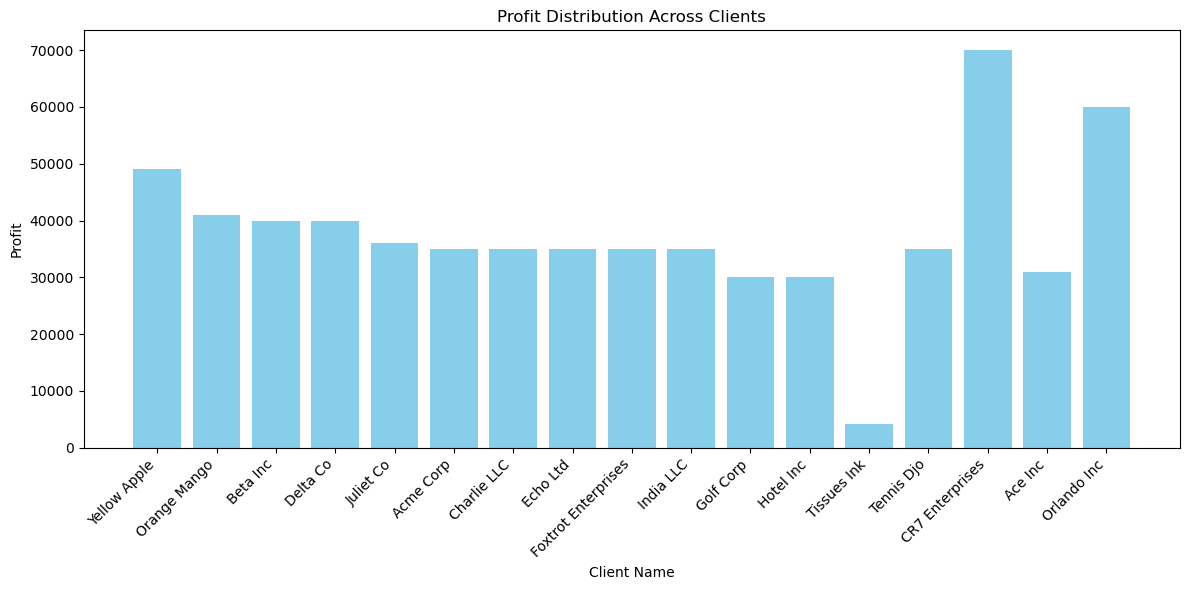

In [42]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the bar chart
plt.bar(df['ClientName'], df['Profit'], color='skyblue')

# Setting the title and labels
plt.title('Profit Distribution Across Clients')
plt.xlabel('Client Name')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')  # Rotate client names for better visibility

# Display the plot
plt.tight_layout()
plt.show()


#### Step 5.2: Visualize the distribution of clients among different financial advisors using a pie chart

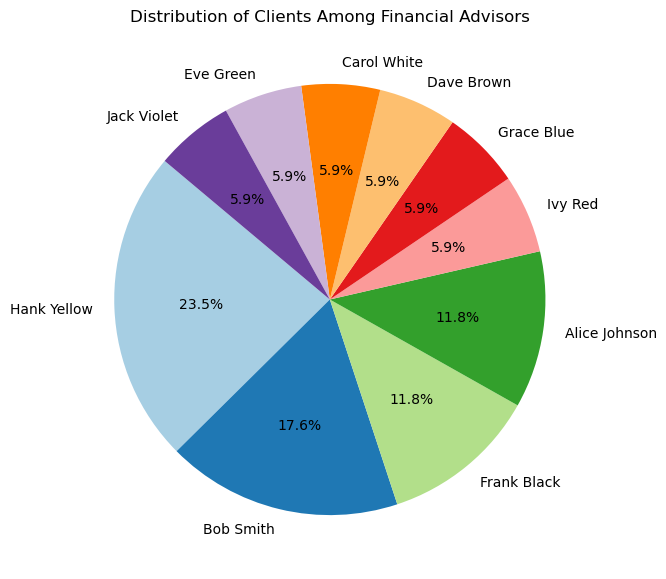

In [43]:
# Counting the number of clients for each financial advisor
advisor_counts = df['FinancialAdvisor'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(advisor_counts, labels=advisor_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Setting the title
plt.title('Distribution of Clients Among Financial Advisors')

# Display the plot
plt.show()


### Step 6: Visualization

#### Step 6.1: Plot a Bar Chart Showing the Profit of Each Client

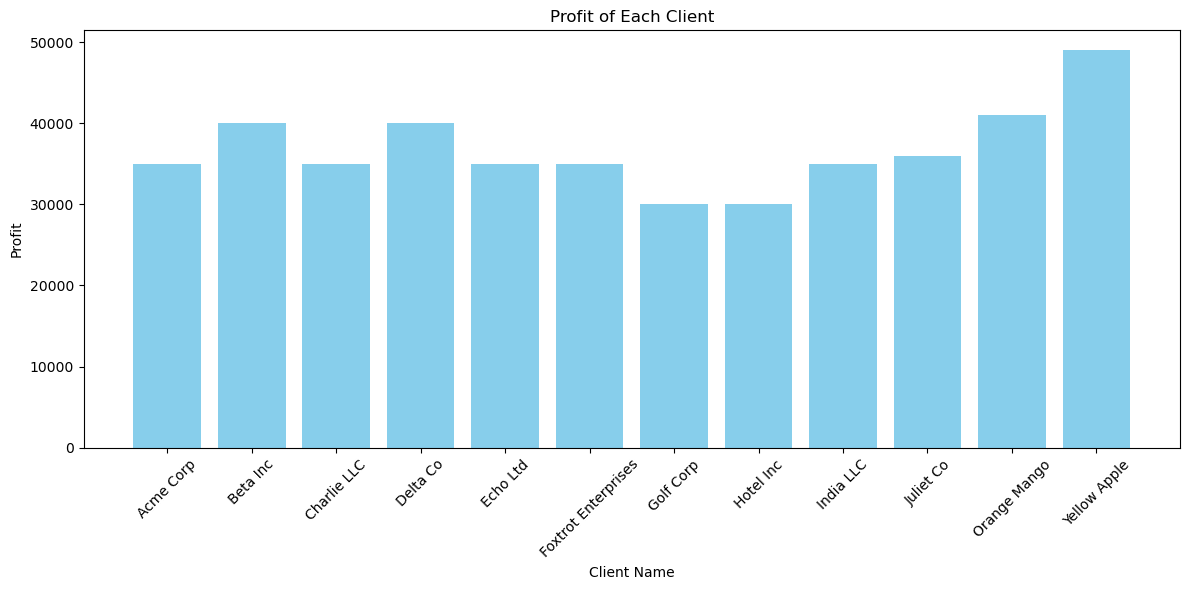

In [15]:
# !pip install matplotlib
import matplotlib.pyplot as plt

# Extract client names and their profits
client_names = [client['ClientName'] for client in financial_data]
profits = [client['Profit'] for client in financial_data]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(client_names, profits, color='skyblue')
plt.xlabel('Client Name')
plt.ylabel('Profit')
plt.title('Profit of Each Client')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Step 6.2: Plot a Pie Chart Showing the Distribution of Clients Among Different Financial Advisors


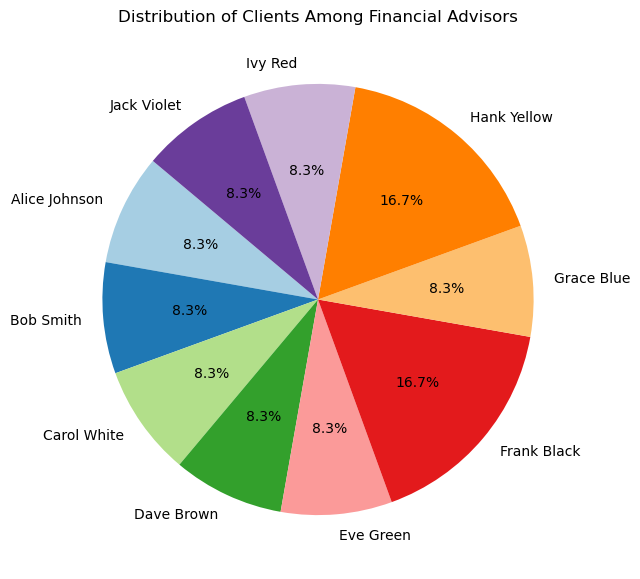

In [16]:
from collections import Counter

advisor_names = [client['FinancialAdvisor'] for client in financial_data]
advisor_counts = Counter(advisor_names)

# Extracting data for pie chart
labels = list(advisor_counts.keys())
sizes = list(advisor_counts.values())

# Plotting
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Clients Among Financial Advisors')
plt.show()


### Step 6: Advanced analysis

#### Step 6.1: Group clients based on profit ranges and determine the number of clients in each range

In [17]:
from collections import defaultdict

# Define profit ranges
profit_ranges = {
    "0-10k": (0, 10000),
    "10k-20k": (10000, 20000),
    "20k-30k": (20000, 30000),
    "30k-40k": (30000, 40000),
    "40k+": (40000, float('inf'))
}

# Categorize clients into profit ranges
profit_bins = defaultdict(int)

for client in financial_data:
    profit = client['Profit']
    for range_name, (low, high) in profit_ranges.items():
        if low <= profit < high:
            profit_bins[range_name] += 1
            break

print(profit_bins)


defaultdict(<class 'int'>, {'30k-40k': 8, '40k+': 4})


#### Step 6.2: Identify any correlations between budget allocation and actual profit


In [18]:
import numpy as np

budgets = [client['Budget'] for client in financial_data]
profits = [client['Profit'] for client in financial_data]

correlation_coefficient = np.corrcoef(budgets, profits)[0, 1]

print(f"Correlation Coefficient between Budget and Profit: {correlation_coefficient:.2f}")


Correlation Coefficient between Budget and Profit: 0.17


#### Step 6.3: Predict the next year's profit for each client based on their current data

In [19]:
from sklearn.linear_model import LinearRegression

# Reshape data for scikit-learn
X = np.array(budgets).reshape(-1, 1)
y = np.array(profits)

# Train a linear regression model
# The LinearRegression() function creates a new linear regression model.
# Linear regression is a statistical method that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.

# The `.fit(X, y)` method trains the linear regression model using the provided data.
# `X` is the independent variable (or variables, in the case of multiple regression). In our case, it's the budget.
# `y` is the dependent variable we're trying to predict, which is the profit in our scenario.

# Once the model is trained with `.fit()`, it can be used to make predictions on new data using the `.predict()` method.

model = LinearRegression().fit(X, y)  # Create and train a linear regression model using the budgets (X) to predict profits (y).

# Predict next year's profit
predicted_profits = model.predict(X)

for client_name, predicted_profit in zip(client_names, predicted_profits):
    print(f"{client_name} next year prediction: ${predicted_profit:.2f}")


Acme Corp next year prediction: $34966.71
Beta Inc next year prediction: $36370.88
Charlie LLC next year prediction: $35528.38
Delta Co next year prediction: $36932.54
Echo Ltd next year prediction: $37494.21
Foxtrot Enterprises next year prediction: $36090.04
Golf Corp next year prediction: $36651.71
Hotel Inc next year prediction: $37213.37
India LLC next year prediction: $37494.21
Juliet Co next year prediction: $37718.87
Orange Mango next year prediction: $37325.71
Yellow Apple next year prediction: $37213.37


### 8 Data Export

#### Step 8.1: Save the analyzed data, including any new columns or calculations, into a new JSON file.


In [20]:
with open('analyzed_data.json', 'w') as file:
    json.dump({"FinancialData": financial_data}, file)

#### Step 8.2: Export a subset of the data (e.g., top 5 profitable clients) into a CSV file.

In [22]:
import csv

# Sort the data based on profit in descending order
top_clients = sorted(financial_data, key=lambda x: x['Profit'], reverse=True)[:]

# Write the top clients to a CSV file
with open('profitable_clients_sorted_from_json.csv', 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=top_clients[0].keys())
    writer.writeheader()
    for client in top_clients:
        writer.writerow(client)